# Add a Dense Layer

In [9]:
import os
import re
import random
import io
import urllib.request
import functools as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from keras.applications import VGG16

from IPython.display import display, HTML

In [10]:
data_dir  = os.path.join("var", "data")
train_dir = os.path.join(data_dir, "train")
val_dir   = os.path.join(data_dir, "validation")
test_dir  = os.path.join(data_dir, "test")
model_dir = os.path.join("var", "model")

os.makedirs(model_dir, exist_ok=True)

In [11]:
def get_conv_base():
    return VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
def display_training_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [29]:
conv_base = get_conv_base()

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [30]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 213s 2s/step - loss: 0.5232 - acc: 0.7560 - val_loss: 0.4561 - val_acc: 0.8810
Epoch 2/30
100/100 [==============================] - 279s 3s/step - loss: 0.3610 - acc: 0.8285 - val_loss: 0.1824 - val_acc: 0.8870
Epoch 3/30
100/100 [==============================] - 421s 4s/step - loss: 0.3451 - acc: 0.8445 - val_loss: 0.3770 - val_acc: 0.8910
Epoch 4/30
100/100 [==============================] - 423s 4s/step - loss: 0.3476 - acc: 0.8510 - val_loss: 0.1672 - val_acc: 0.8920
Epoch 5/30
100/100 [==============================] - 204s 2s/step - loss: 0.3382 - acc: 0.8510 - val_loss: 0.1344 - val_acc: 0.8680
Epoch 6/30
100/100 [==============================] - 231s 2s/step - loss: 0.3220 - acc: 0.8500 - val_loss: 0.1498 - val_acc: 0.8910
Epoch 7/30
100/100 [==============================] - 244s 2s/step - loss: 0.3174 - acc: 0.8570 - val_loss: 0.1008 - val_acc: 0.9010
Epoch 8/30
100/100 [==============================] - 245s 2s/step - 

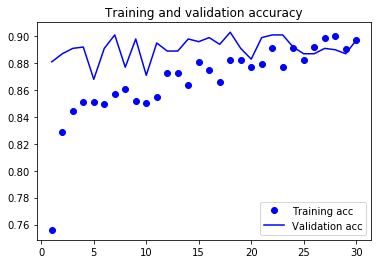

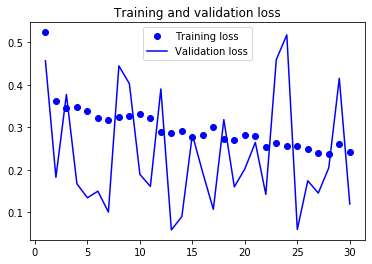

In [31]:
display_training_history(history)

In [32]:
model.save(f'{model_dir}/cats_and_dogs_small_4.h5')